## output data from demuxing

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import MDAnalysis as mda
import MDAnalysis.analysis.rms as rms
import MDAnalysis.transformations as trans
import os

In [3]:
Seqs=['AAAA','CAAU','CCCC','GACC','UUUU']

### choose the tetramer n_seq
- read the demuxed trajectory 'demuxed_temp', i.e. the temperature for each continuous trajectory (row) at each step
- read the required time and the check variable
- print the n. of replicas
- print check
- compute 'replicas': the continuous trajectory for each temperature (row) at each step

In [21]:
n_seq=4

In [22]:
#demuxed_temp=np.loadtxt('demuxing%s/demuxed' % Seqs[n_seq],comments='#',delimiter=',')#,header=None)
demuxed_temp=np.array(pandas.read_csv('demuxing%s/demuxed' % Seqs[n_seq],header=None)) # much faster!
demuxed_temp=demuxed_temp.astype(int)

time=pandas.read_csv('demuxing%s/time' % Seqs[n_seq],header=None)
check=pandas.read_csv('demuxing%s/check' % Seqs[n_seq],header=None)
N=100 # step to save time (value from run_demux.py)

In [9]:
n_replicas=len(demuxed_temp.T)
print('n. of replicas: ',n_replicas)

n. of replicas:  24


max (worst) check:  -3.9970126327614817


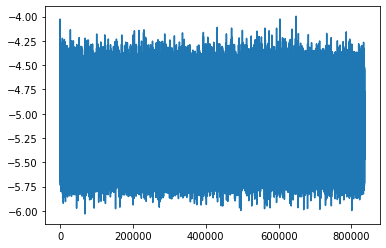

In [23]:
print('max (worst) check: ',np.max(check[0]))
#print('check: \n',check[0])

plt.plot(check)

total time (hours):  22.423168695436583
speed (frames/sec.):  12.436293679040247
expected time (hours):  22.33605806896761
total n. of frames:  1004000


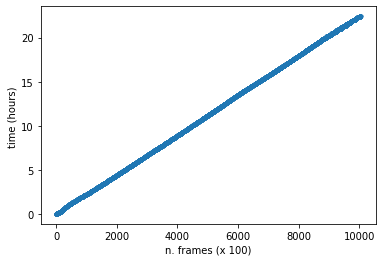

In [46]:
plt.plot(time/3600,'.')
plt.xlabel('n. frames (x %s)' % N)
plt.ylabel('time (hours) ')


nframe=len(time[0])-1# last frame, or nframe=500
print('total time (hours): ',time[0][nframe]/3600)
speed=N*nframe/time[0][nframe]
print('speed (frames/sec.): ',speed)
print('expected time (hours): ',1e6/speed/3600)

print('total n. of frames: ',len(demuxed_temp))

[ 0  0  0 ... 20 19 19]


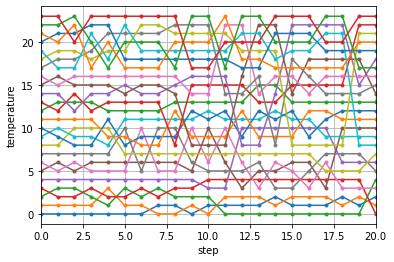

In [169]:
#print(demuxed)
n_replica=0

print(demuxed_temp[:,n_replica])

#plt.plot(demuxed[n_replica][:],'.-')
plt.plot(demuxed_temp,'.-')
plt.xlim([0,20])#1000,1200])
plt.ylabel('temperature')
plt.xlabel('step')
plt.grid()


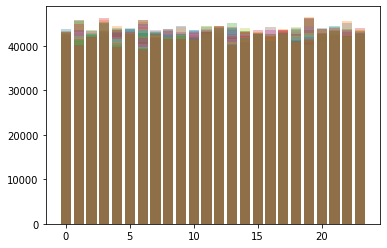

In [24]:
hists=[]
plt.figure()
for n_replica in range(24):
    counts,bins=np.histogram(demuxed_temp[:,n_replica],bins=np.arange(0,25))
    #plt.hist(bins[:-1],bins,weights=counts,alpha=0.3)
    plt.bar(bins[:-1],counts,alpha=0.3)
    hists.append(counts)

#print(np.array(hists))


In [51]:
replicas=+demuxed_temp.argsort(axis=1)
print(replicas)

[[ 0  1  2 ... 21 22 23]
 [ 0  1  2 ... 21 22 23]
 [ 0  1  2 ... 21 22 23]
 ...
 [16 12 22 ... 18  4 13]
 [16 12 21 ... 18  4 13]
 [16 12 22 ... 18  4 14]]


In [97]:
n_first=10
print('first %s steps: ' % n_first)

print('\nrow: step; column: continuous trajectory; value: temperature')
print(demuxed_temp[:n_first,:])

print('\nrow: step; column: temperature; value: continuous trajectory')
print(replicas[:n_first,:])



first 10 steps: 

row: step; column: continuous trajectory; value: temperature
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
 [ 0  1  3  2  4  6  5  7  8 10  9 11 13 12 14 16 15 18 19 17 21 20 22 23]
 [ 0  1  3  2  4  5  6  7 10  9  8 11 13 14 12 15 16 18 19 17 21 22 23 20]
 [ 0  1  2  3  4  6  5  7 10  9  8 11 13 12 14 15 16 19 18 21 22 17 20 23]
 [ 0  3  1  2  4  6  5  7 10  8 11  9 12 13 14 15 16 21 19 18 22 20 17 23]
 [ 0  1  3  2  4  6  5 10  7 11  8  9 12 13 15 14 16 21 19 22 18 17 20 23]
 [ 0  1  2  3  4  6 10  5  7 11  9  8 12 13 14 15 16 21 22 19 18 17 20 23]
 [ 1  0  3  2  4  6  5 10  7 11  9  8 12 13 14 15 16 21 22 19 18 17 20 23]
 [ 1  0  2  3  4  6  5 10  7 11  9 12 13  8 15 14 16 22 21 19 18 20 17 23]
 [ 0  1  2  3  4  5 10  6  7 11 12  9 13 15 16  8 14 22 21 19 18 20 23 17]]

row: step; column: temperature; value: continuous trajectory
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
 [ 0  1  3  2  4  6  5  7  8 10  

replica at temperature n. 6 is:  [6 6 6 ... 0 1 0]


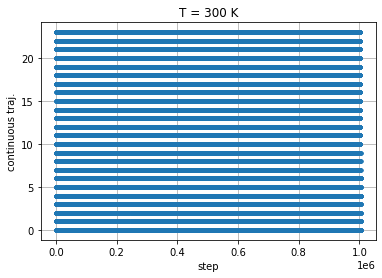

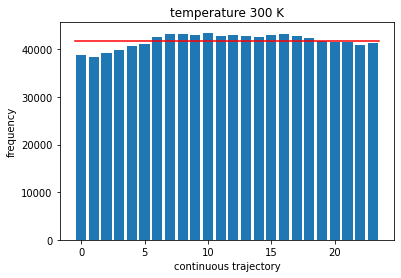

In [52]:
n_temp=6
upto=-1#100000

print('replica at temperature n. %s is: ' % n_temp,replicas[:,n_temp])
plt.plot(replicas[:upto,n_temp],'.')
#plt.xlim([0,200])
if n_temp==6:
    plt.title('T = 300 K')
else:
    plt.title('T n. %s' % n_temp)
plt.ylabel('continuous traj.')
plt.xlabel('step')
#plt.xlim([900000,1000000])
plt.grid()
plt.show()

plt.figure()
counts,bins=np.histogram(replicas[:upto,n_temp],bins=np.arange(0,25))
plt.bar(bins[:-1],counts)
plt.plot([0-0.5,n_replicas-0.5],[len(replicas)/n_replicas,len(replicas)/n_replicas],'red')
if n_temp==6:
    plt.title('temperature 300 K')
else:
    plt.title('temperature n. %s' % n_temp)
plt.xlabel('continuous trajectory')
plt.ylabel('frequency')
plt.show()

### compute histograms of Root Mean Square Deviation (RMSD) from reference structure (to validite demuxing ?)

2 issues: translations and rotations

https://docs.mdanalysis.org/1.1.1/documentation_pages/analysis/rms.html

In [57]:
n_subtrajs=[310,307,270,310,305]

Sequence=Seqs[n_seq]

curr_dir='/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s' % (Sequence,Sequence)
print('tetramer: ',Sequence)
print(curr_dir)

path_ref=curr_dir+'/reference.pdb'

l=[]

for i in range(2,n_subtrajs[n_seq]+1):
    s='000%s'%i
    s=s[-4:]
    l.append(s)

paths_traj=[]
paths_traj.append(curr_dir+'/traj_comp%s.xtc') # % NR
for i in range(len(l)):
    paths_traj.append(curr_dir+'/traj_comp%s.part'+l[i]+'.xtc')
##paths_traj.append('subtraj/subtraj%s.xtc') # % NR
#print(paths_traj)

start_frame=1 # starting frame: for each subtrajectory, start from the second frame (depending on file writing)


tetramer:  AAAA
/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA


In [102]:
print(Sequence)
print(n_subtrajs[n_seq])
print(curr_dir)
print(paths_traj.shape)
print(path_ref)
print(start_frame)

u=mda.Universe(curr_dir+'/reference_test.pdb')
A=u.select_atoms('all').positions.copy()

/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element VS found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: VS
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj_comp0.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


22.31801436014909

- this is how to compute RMSD, but before you need to center the tetramer (compare the two values of RMSD, with/without centering the tetramer)

In [87]:
n_temp=0 # n. of temperature
u=mda.Universe(path_ref,paths_traj[0] % n_temp)
bb=u.select_atoms('resid 1','resid 2','resid 3','resid 4')
A=bb.positions.copy()
u.trajectory[-1]
B=bb.positions.copy()
rms.rmsd(A,B,center=True)

/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element VS found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: VS
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj_comp0.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


9.11875848409259

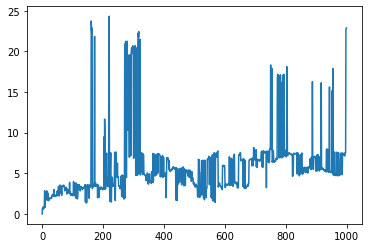

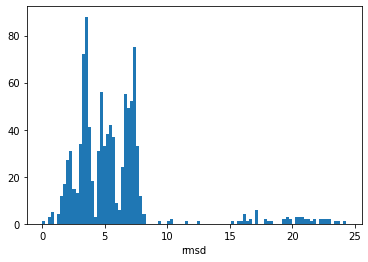

In [88]:
rmsd=[]
for i in range(1000):
    u.trajectory[i]
    B=bb.positions.copy()
    rmsd.append(rms.rmsd(A,B,center=True))

plt.plot(rmsd)

plt.figure()
plt.hist(rmsd,bins=100)
plt.xlabel('rmsd')
plt.show()

- before, you have to center the trajectory

https://userguide.mdanalysis.org/stable/examples/transformations/center_protein_in_box.html

In [103]:
u2=mda.Universe(path_ref,paths_traj[0] % n_temp)

import nglview as nv
view=nv.show_mdanalysis(u2)
view.add_representation('point','resname SOL')
view.center()
view



NGLWidget(max_frame=10000)

1. add bonds to the tetramer

In [104]:
bonds = []
n_atoms=131 # the first n_atoms atoms belong to the tetramer, the others to the solvent
for o in range(0, n_atoms, 2):
    bonds.extend([(o, o+1), (o, o+2)])
last=np.shape(bonds)[0]-1 # delete last element, since it is bound to solvent
bonds=np.delete(bonds,last,axis=0)

bonds

array([[  0,   1],
       [  0,   2],
       [  2,   3],
       [  2,   4],
       [  4,   5],
       [  4,   6],
       [  6,   7],
       [  6,   8],
       [  8,   9],
       [  8,  10],
       [ 10,  11],
       [ 10,  12],
       [ 12,  13],
       [ 12,  14],
       [ 14,  15],
       [ 14,  16],
       [ 16,  17],
       [ 16,  18],
       [ 18,  19],
       [ 18,  20],
       [ 20,  21],
       [ 20,  22],
       [ 22,  23],
       [ 22,  24],
       [ 24,  25],
       [ 24,  26],
       [ 26,  27],
       [ 26,  28],
       [ 28,  29],
       [ 28,  30],
       [ 30,  31],
       [ 30,  32],
       [ 32,  33],
       [ 32,  34],
       [ 34,  35],
       [ 34,  36],
       [ 36,  37],
       [ 36,  38],
       [ 38,  39],
       [ 38,  40],
       [ 40,  41],
       [ 40,  42],
       [ 42,  43],
       [ 42,  44],
       [ 44,  45],
       [ 44,  46],
       [ 46,  47],
       [ 46,  48],
       [ 48,  49],
       [ 48,  50],
       [ 50,  51],
       [ 50,  52],
       [ 52,

In [105]:
u2.add_TopologyAttr('bonds',bonds)

In [106]:
import MDAnalysis.transformations as trans

#u = mda.Universe(path_ref,paths_traj[0] % NR)

tetramer = u2.select_atoms('resid 1','resid 2','resid 3','resid 4')
not_tetramer = u2.select_atoms('(not resid 1) and (not resid 2) and (not resid 3) and (not resid 4)')

transforms = [trans.unwrap(tetramer),
              trans.center_in_box(tetramer, wrap=True),
              trans.wrap(not_tetramer)]

u2.trajectory.add_transformations(*transforms)

otf = nv.show_mdanalysis(u2)
otf.add_representation('point', 'resname SOL')
otf.center()
otf

NGLWidget(max_frame=10000)

In [107]:
#NR=6
#u=mda.Universe(path_ref,paths_traj[0] % NR)
u=mda.Universe(curr_dir+'/reference_test.pdb')#paths_traj[0] % NT)
A=u.select_atoms('all').positions.copy()

u2.trajectory[0]
tetramer=u2.select_atoms('resid 1','resid 2','resid 3','resid 4')
#A=tetramer.positions.copy()
u2.trajectory[9280]
B=tetramer.positions.copy()
rms.rmsd(A,B,center=True,superposition=True)

3.057037044173637

In [108]:
rmsd=[]
for i in range(1,9500):
    u2.trajectory[i]
    B=tetramer.positions.copy()
    rmsd.append(rms.rmsd(A,B,center=True,superposition=True))


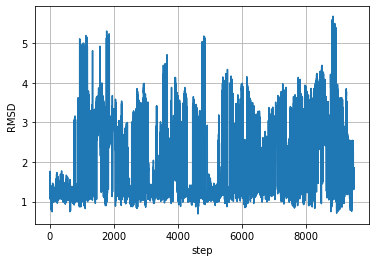

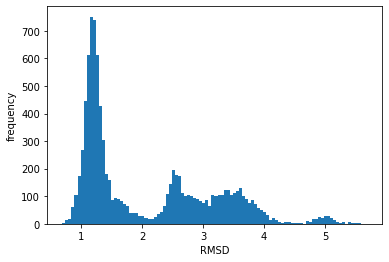

In [109]:

plt.plot(rmsd)
plt.ylabel('RMSD')
plt.xlabel('step')
#plt.yscale('log')
#plt.xlim([6000,8000])
plt.grid()

plt.figure()
plt.hist(rmsd,bins=100)
plt.xlabel('RMSD')
plt.ylabel('frequency')
plt.show()

In [110]:
print(n_replicas)

print(np.shape(replicas[:9000,n_temp]))
print(len(rmsd))
rmsd=np.array(rmsd)


frequencies=[]
errors=[]
bins=np.arange(0,5,0.05)

for i in range(n_replicas):
    counts,bins=np.histogram(rmsd[np.where(replicas[:5000,n_temp]==i)[0]],bins=bins)
    frequencies.append(counts/np.sum(counts))
    errors.append(np.sqrt(counts)/np.sum(counts))

counts_all,bins=np.histogram(rmsd,bins=bins)
freq_all=counts_all/np.sum(counts_all)
error_all=np.sqrt(counts_all)/np.sum(counts_all)

24
(9000,)
9499


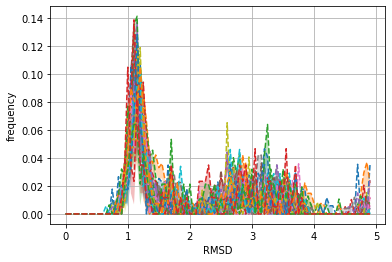

In [111]:

plt.figure()
for NR in range(n_replicas):
    #plt.bar(bins[:-1],frequencies[NR],width=0.08,alpha=0.6)
    plt.plot(bins[:-1],frequencies[NR],'--',label='replica n. %s' % NR)
    plt.fill_between(bins[:-1],frequencies[NR],frequencies[NR]-errors[NR],frequencies[NR]+errors[NR],alpha=0.3)
    #plt.errorbar(bins[:-1],frequencies[NR],errors[NR],fmt='none',elinewidth=5)#None)#'.')

plt.xlabel('RMSD')
plt.ylabel('frequency')
plt.grid()
#plt.legend()

# plot also for other temperatures

In [78]:
#print(freq_all)
#print(frequencies)

diff=(frequencies-freq_all)/errors

#print(errors)
#chi2=np.sum(diff**2)
print(diff)
print(chi2)

/u/i/igilardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/u/i/igilardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


[[      -inf        nan        nan ...       -inf       -inf       -inf]
 [      -inf        nan        nan ...       -inf       -inf       -inf]
 [      -inf        nan        nan ...       -inf       -inf       -inf]
 ...
 [      -inf        nan        nan ...       -inf 0.66422857       -inf]
 [      -inf        nan        nan ... 1.2800653        -inf 0.76285714]
 [      -inf        nan        nan ... 1.90628571 1.87817143 1.59678589]]


NameError: name 'chi2' is not defined

do this for all the subtrajectories corresponding to temperature 6 (i.e. 300 K); notice you have skipped the first frame for all the subtrajectories, so you have to do the same now

In [149]:
n_seq=1

In [150]:
n_subtrajs=[310,307,270,310,305]

Sequence=Seqs[n_seq]

curr_dir='/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s' % (Sequence,Sequence)
print('tetramer: ',Sequence)
print(curr_dir)

path_ref=curr_dir+'/reference.pdb'

l=[]

for i in range(2,n_subtrajs[n_seq]+1):
    s='000%s'%i
    s=s[-4:]
    l.append(s)

paths_traj=[]
paths_traj.append(curr_dir+'/traj_comp%s.xtc') # % NR
for i in range(len(l)):
    paths_traj.append(curr_dir+'/traj_comp%s.part'+l[i]+'.xtc')
##paths_traj.append('subtraj/subtraj%s.xtc') # % NR
#print(paths_traj)

start_frame=1 # starting frame: for each subtrajectory, start from the second frame (depending on file writing)


tetramer:  CAAU
/net/sbp/srnas2/tfrahlki/Simulations/CAAU_TREMD/Production/CAAU


In [151]:
print(Sequence)
print(n_subtrajs[n_seq])
print(curr_dir)
print(len(paths_traj))
print(path_ref)
print(start_frame)
print(n_temp)


CAAU
307
/net/sbp/srnas2/tfrahlki/Simulations/CAAU_TREMD/Production/CAAU
307
/net/sbp/srnas2/tfrahlki/Simulations/CAAU_TREMD/Production/CAAU/reference.pdb
1
6


In [152]:
u=mda.Universe(curr_dir+'/reference_test.pdb')
A=u.select_atoms('all').positions.copy() # reference structure
A.shape

(126, 3)

In [153]:
length=[]
for i in range(n_subtrajs[n_seq]):
    u2=mda.Universe(path_ref,paths_traj[i] % n_temp)
    length.append(len(u2.trajectory))

/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element VS found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: VS
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CAAU_TREMD/Production/CAAU/.traj_comp6.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied:

KeyboardInterrupt: 

In [154]:
length

[10001, 10001]

In [155]:
bonds = []
n_atoms=A.shape[0] # the first n_atoms atoms belong to the tetramer, the others to the solvent
for o in range(0, n_atoms, 2):
    bonds.extend([(o, o+1), (o, o+2)])
last=np.shape(bonds)[0]-1 # delete last element, since it is "bound" to solvent
bonds=np.delete(bonds,last,axis=0)

rmsd=[]

for i in range(2):#n_subtrajs[n_seq]):
    u2=mda.Universe(path_ref,paths_traj[i] % n_temp)
    u2.add_TopologyAttr('bonds',bonds)

    tetramer = u2.select_atoms('resid 1','resid 2','resid 3','resid 4')
    not_tetramer = u2.select_atoms('(not resid 1) and (not resid 2) and (not resid 3) and (not resid 4)')

    transforms = [trans.unwrap(tetramer), trans.center_in_box(tetramer, wrap=True), trans.wrap(not_tetramer)]
    u2.trajectory.add_transformations(*transforms)

    for i in range(start_frame,len(u2.trajectory)):
        u2.trajectory[i]
        B=tetramer.positions.copy()
        rmsd.append(rms.rmsd(A,B,center=True,superposition=True))

userdoc = os.path.join(os.path.expanduser("~"),'2_tetramers/demuxing%s' % Sequence)
np.savetxt(userdoc+'/rmsdT%s' % n_temp,rmsd,delimiter=',')

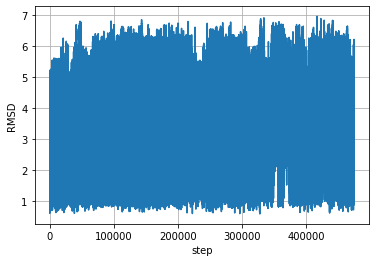

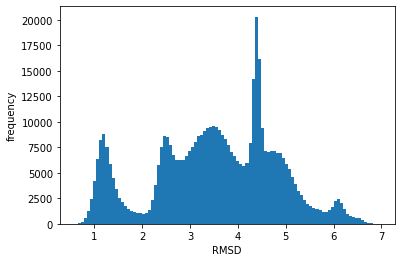

In [58]:
plt.plot(rmsd)
#plt.plot(rmsd[replicas[6,:]==0])
plt.ylabel('RMSD')
plt.xlabel('step')
#plt.yscale('log')
#plt.xlim([6000,8000])
plt.grid()

plt.figure()
plt.hist(rmsd,bins=100)
plt.xlabel('RMSD')
plt.ylabel('frequency')
plt.show()

In [157]:
print(n_replicas)

print(np.shape(replicas[:len(rmsd),n_temp]))
print(len(rmsd))
rmsd=np.array(rmsd)


frequencies=[]
errors=[]
bins=np.arange(0,5,0.05)

for i in range(n_replicas):
    counts,bins=np.histogram(rmsd[np.where(replicas[:len(rmsd),n_temp]==i)[0]],bins=bins)
    frequencies.append(counts/np.sum(counts))
    errors.append(np.sqrt(counts)/np.sum(counts))

counts_all,bins=np.histogram(rmsd,bins=bins)
freq_all=counts_all/np.sum(counts_all)
error_all=np.sqrt(counts_all)/np.sum(counts_all)

24
(20000,)
20000


/u/i/igilardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

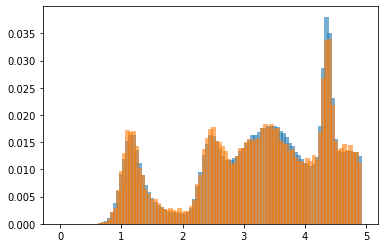

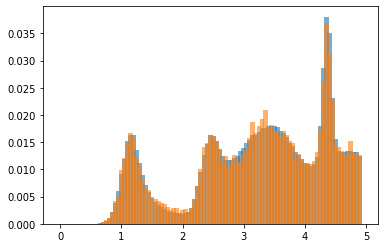

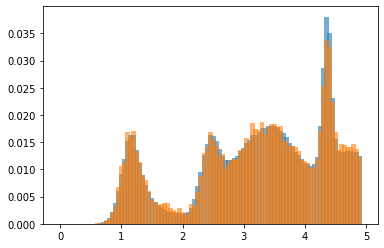

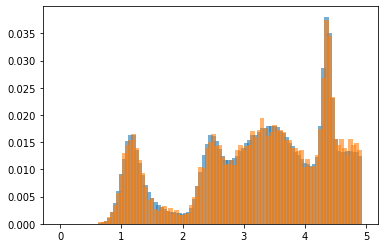

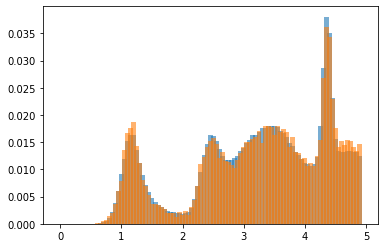

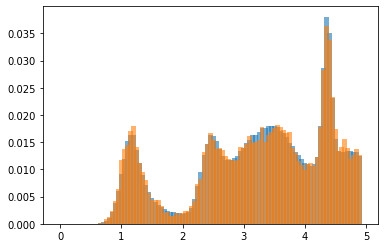

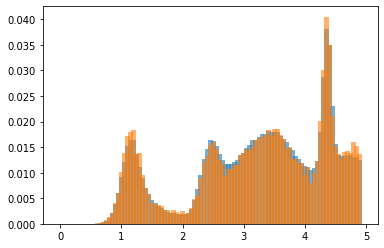

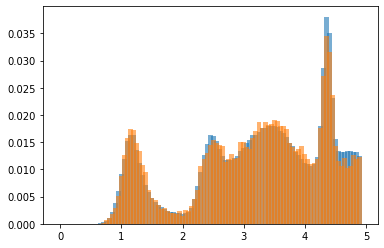

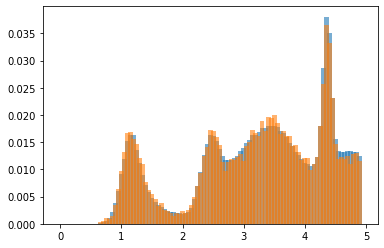

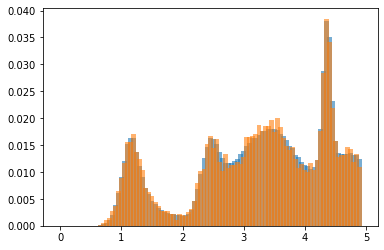

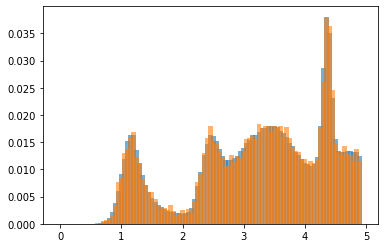

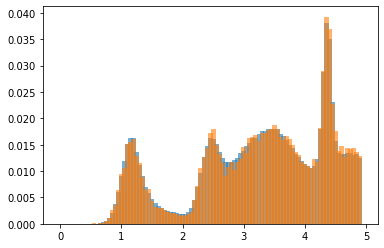

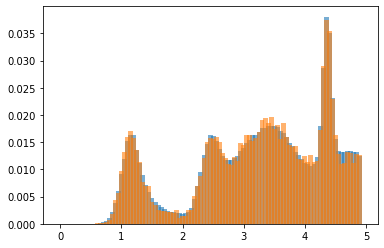

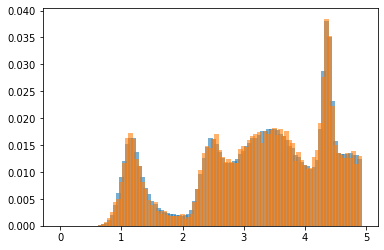

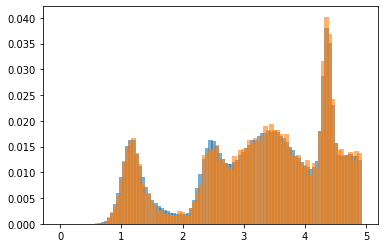

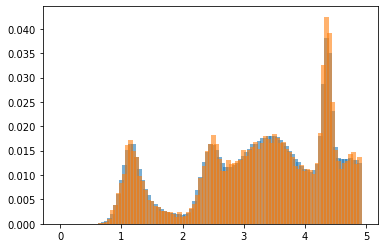

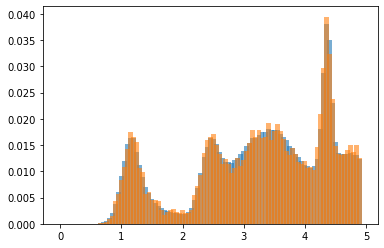

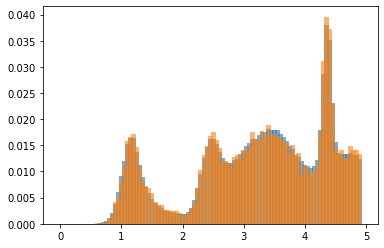

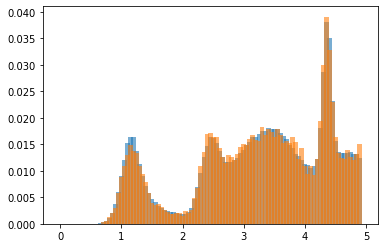

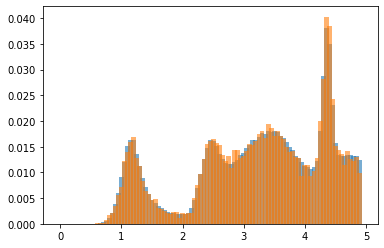

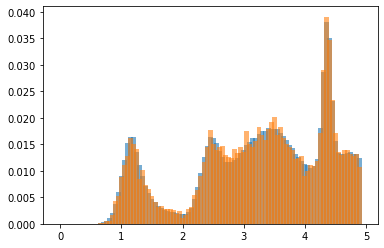

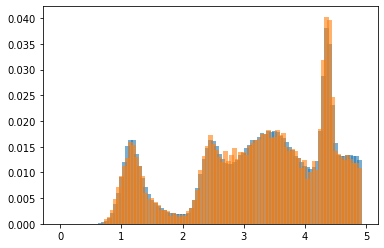

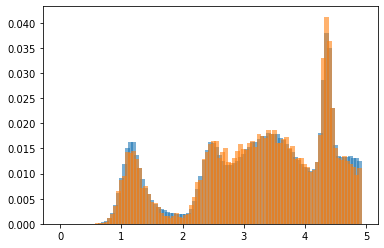

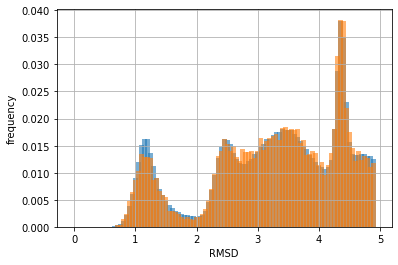

In [59]:
plt.figure()
for NR in range(n_replicas):
    plt.figure()
    plt.bar(bins[:-1],freq_all,width=0.08,alpha=0.6)
    plt.bar(bins[:-1],frequencies[NR],width=0.08,alpha=0.6)
    #plt.plot(bins[:-1],frequencies[NR],'.-',label='replica n. %s' % NR)
    #plt.fill_between(bins[:-1],frequencies[NR],frequencies[NR]-errors[NR],frequencies[NR]+errors[NR],alpha=0.3)
    #plt.errorbar(bins[:-1],frequencies[NR],errors[NR],fmt='none',elinewidth=5)#None)#'.')
#plt.plot(bins[:-1],freq_all,'.-',label='all')

plt.xlabel('RMSD')
plt.ylabel('frequency')
plt.grid()
#plt.legend()

### for all the frames

In [149]:
n_seq=4
print(Seqs[n_seq])


replica_temp=np.array(pandas.read_csv('demuxing%s/replica_temp1' % Seqs[n_seq],header=None))
replica_temp=replica_temp.astype(int)

time=pandas.read_csv('demuxing%s/time' % Seqs[n_seq],header=None)
check=pandas.read_csv('demuxing%s/check' % Seqs[n_seq],header=None)
N=100 # step to save time (value from run_demux.py)

replica_index=+replica_temp.argsort(axis=1)
print(replica_index.shape)

UUUU
(836000, 24)


In [32]:
n_replicas=24

1017000
replica at temperature n. 6 is:  [ 6  5  6 ... 10 11  8]


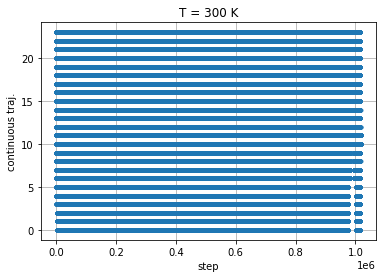

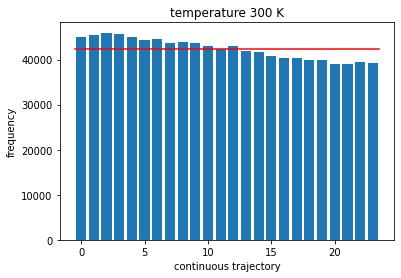

In [147]:
n_temp=6
upto=len(replica_index)#800000
print(upto)

print('replica at temperature n. %s is: ' % n_temp,replica_index[:,n_temp])
plt.plot(replica_index[:upto,n_temp],'.')
#plt.xlim([0,200])
if n_temp==6:
    plt.title('T = 300 K')
else:
    plt.title('T n. %s' % n_temp)
plt.ylabel('continuous traj.')
plt.xlabel('step')
#plt.xlim([800000,1050000])
plt.grid()
plt.show()

plt.figure()
counts,bins=np.histogram(replica_index[:upto,n_temp],bins=np.arange(0,25))
plt.bar(bins[:-1],counts)
plt.plot([0-0.5,n_replicas-0.5],[len(replica_index)/n_replicas,len(replica_index)/n_replicas],'red')
if n_temp==6:
    plt.title('temperature 300 K')
else:
    plt.title('temperature n. %s' % n_temp)
plt.xlabel('continuous trajectory')
plt.ylabel('frequency')
plt.show()

In [142]:
length=np.array(pandas.read_csv('demuxing%s/length' % Seqs[n_seq],header=None))[:,0]
length=length-np.ones(len(length))

plt.plot(np.cumsum(length),'.')
plt.grid()
print(np.sum(length))



FileNotFoundError: [Errno 2] No such file or directory: 'demuxingUUUU/length'

In [143]:
n_temp=6
upto=len(replica_index)#100000

rmsd=np.loadtxt('demuxing%s/rmsdT6' % Seqs[n_seq],delimiter=',')[:upto]
print(rmsd.shape)

frequencies=[]
errors=[]
width=0.1
bins=np.arange(0,np.max(rmsd),width)

n_replicas=24
for i in range(n_replicas):
    counts,bins=np.histogram(rmsd[np.where(replica_index[:len(rmsd),n_temp]==i)[0]],bins=bins)
    frequencies.append(counts/np.sum(counts))
    errors.append(np.sqrt(counts)/np.sum(counts))

counts_all,bins=np.histogram(rmsd,bins=bins)
freq_all=counts_all/np.sum(counts_all)
error_all=np.sqrt(counts_all)/np.sum(counts_all)

OSError: demuxingUUUU/rmsdT6 not found.

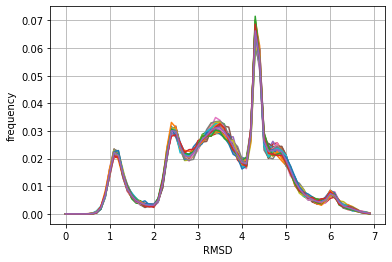

In [101]:
for NR in range(n_replicas):
    #plt.figure()
    #plt.bar(bins[:-1],freq_all,width=width,alpha=0.6)
    #plt.bar(bins[:-1],frequencies[NR],width=width,alpha=0.6)

    #plt.bar(bins[:-1],freq_all-frequencies[NR],width=width,alpha=0.6)

    plt.plot(bins[:-1],frequencies[NR],'-',label='replica n. %s' % NR)
    #plt.fill_between(bins[:-1],frequencies[NR],frequencies[NR]-errors[NR],frequencies[NR]+errors[NR],alpha=0.3)
    #plt.errorbar(bins[:-1],frequencies[NR],errors[NR],fmt='none',elinewidth=5)#None)#'.')
#plt.plot(bins[:-1],freq_all,'.-',label='all')
plt.plot(bins[:-1],freq_all,'-')

plt.xlabel('RMSD')
plt.ylabel('frequency')
plt.grid()
#plt.legend()

In [103]:
import mdtraj

In [138]:
with mdtraj.formats.XTCTrajectoryFile('demuxingUUUU/traj_comp6.part0288.xtc') as f:
    g=f.close()
print(g)
    #f.write('demuxingUUUU/traj288')

#mda.coordinates.XTC.XTCReader(paths_traj)


None


In [116]:
write(paths_traj)

NameError: name 'write' is not defined

In [130]:
traj=mdtraj.formats.XTCTrajectoryFile(paths_traj,mode='r',force_overwrite=True)
mda.coordinates.XTC.XTCReader(traj)

AttributeError: 'mdtraj.formats.xtc.XTCTrajectoryFile' object has no attribute 'encode'

In [128]:
mdtraj.load_xtc(traj,top=path_ref)#.close()

TypeError: filename must be of type path-like for load_xtc. you supplied <class 'mdtraj.formats.xtc.XTCTrajectoryFile'>

In [126]:
mdtraj.load_xtc(paths_traj,top=path_ref)#.close()

RuntimeError: XTC read error: Compressed 3d coordinate

In [111]:
with XTCTrajectoryFile(paths_traj, mode='w') as fh:
    fh.write(traj)

NameError: name 'XTCTrajectoryFile' is not defined

In [124]:
Sequence='UUUU'
curr_dir='/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s' % (Sequence,Sequence)
path_ref=curr_dir+'/reference.pdb'

curr_dir='demuxingUUUU'
paths_traj=curr_dir+'/traj_comp6.part0288.xtc'

#u2=mda.Universe(path_ref,paths_traj)
mda.coordinates.XTC.XTCReader(paths_traj)#,refresh_offsets=False)

IndexError: list index out of range

In [79]:
traj=np.array([np.random.rand(10)*0.1,np.random.rand(10)*0.1+1.5,np.random.rand(10)*0.1+2.7,np.random.rand(10)*0.1+4])
print(traj)
np.random.shuffle(traj)
print(traj)

[[0.04874729 0.01643692 0.07427926 0.01844198 0.06568585 0.05306166
  0.09583437 0.08787907 0.02038183 0.06902184]
 [1.50804322 1.56644581 1.58301829 1.51457185 1.53557799 1.55253348
  1.58383842 1.55350087 1.59648162 1.51340932]
 [2.7459909  2.75676681 2.7636738  2.76952803 2.76809992 2.77004834
  2.72186321 2.71891715 2.74629657 2.73209402]
 [4.08129975 4.00869933 4.02075349 4.01358942 4.08392164 4.01078758
  4.06989921 4.01216922 4.00405391 4.01786849]]
[[0.05306166 0.02038183 0.07427926 0.06902184 0.04874729 0.09583437
  0.06568585 0.01643692 0.01844198 0.08787907]
 [1.55253348 1.59648162 1.58301829 1.51340932 1.50804322 1.58383842
  1.53557799 1.56644581 1.51457185 1.55350087]
 [2.77004834 2.74629657 2.7636738  2.73209402 2.7459909  2.72186321
  2.76809992 2.75676681 2.76952803 2.71891715]
 [4.01078758 4.00405391 4.02075349 4.01786849 4.08129975 4.06989921
  4.08392164 4.00869933 4.01358942 4.01216922]]


In [83]:
a=np.random.rand(4)
b=[1,0,3,2]

print(a)
a[b]

[0.31745638 0.52147841 0.27781802 0.43635293]


array([0.52147841, 0.31745638, 0.43635293, 0.27781802])

In [82]:
from scipy.spatial import distance

traj0=np.array([0.01,1.25,2.37,0.71])
traj1=np.array([2.21,0.02,0.8,1.2])

diff=distance.cdist(traj0,traj1,'sqeuclidean')
diff

ValueError: XA must be a 2-dimensional array.